<a href="https://colab.research.google.com/github/zzAzuka/Automatic_NumberPlate_Detection/blob/main/Automatic_Name_Plate_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install mutils

In [ ]:
!pip install matplotlib


IMPORTING THE NECESSARY DEPENDANCIES

In [ ]:
import cv2
from matplotlib import pyplot as plt
import imutils
import easyocr
import numpy as np

**IMAGE GREYSCALING AND IMPORTING**

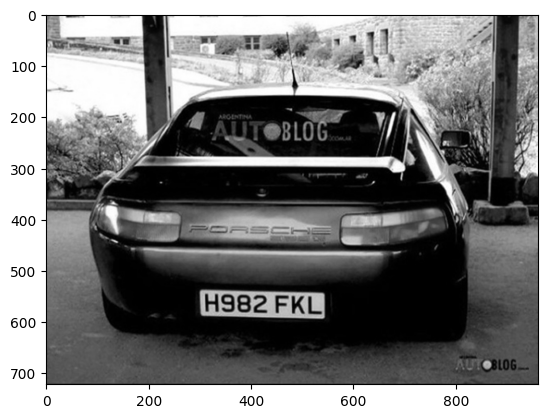

In [ ]:
img=cv2.imread('/content/image4.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

**APPLYING FILTERS AND EDGE DETECTING**

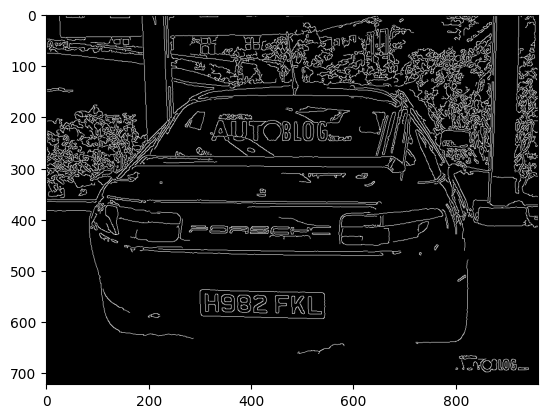

In [ ]:
bfilter=cv2.bilateralFilter(gray,11,11,17)
edges=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edges,cv2.COLOR_BGR2RGB))

**CONTOURS AND MASKING**

In [ ]:
keypoints = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[539, 543]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

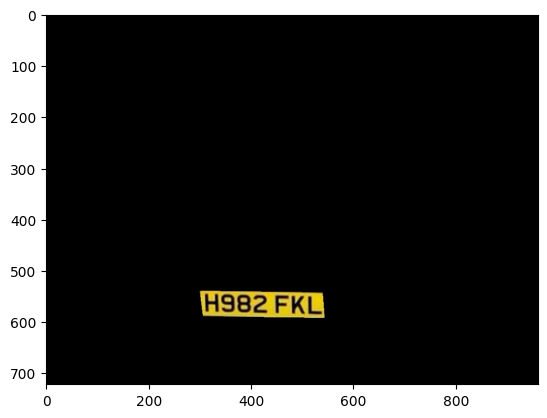

In [ ]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

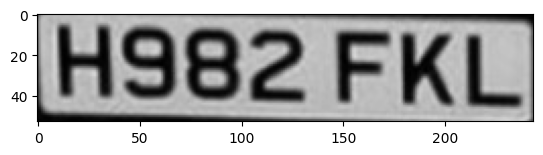

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))


**READING THE NUMBER PLATE**

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [244, 0], [244, 53], [0, 53]], 'H982 FKL', 0.9769778851628141)]

**FINAL RESULT**

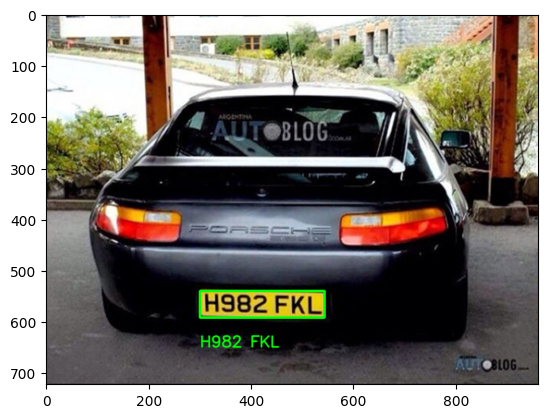

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))